<br><span style="color:tomato; font-size:50px; font-family:Georgia;"><b>Extra! Extra! Read All About It!</b></span><br>
<span style="color:darkorange; font-size:20px"><i>Recommender System Implementation for Rappler's Science and Technology Sections</i></span> 
<br><span style="color:gray; font-size:12px">Data Mining and Wrangling 1 Lab / Mini-Project 2</span>

![banner](news_banner.png)

<h1 style="color:tomato; font-family:Georgia; font-size:30px">Executive Summary</h1>

Rappler's campaign against disinformation has shoot the online news website's popularity up. Whether for better or for worse is irrelevant. As such, an optimized search engine for the website is important as more people flock to the website to look for, read, and sometimes critique its content. From keywords, a reader will be able to search for articles suited to his or her purpose, actual reading interest, or even array of topics of interest.

This project implements a search engine function similar to the actual website's search engine page. Through data mining/web scraping, we've gathered enough data to mimic a search engine. This is implemented through several tests and calibration of IR measures and algorithms such as cosine distance measure, Euclidean distance measure, term frequency-inverse document frequency log likelihood, and L-normalizations.

The implemented search engine through IR yields desirable results, with high precision and low recall (targeting only articles under sections Science and Technology). Comparing this to the results of the actual search engine, we see that this project search engine provides more relevant results than that of the actual search. Several factors may affect this including actual SEO analytics done on Rappler's website.

As this project is only limited to the Science and Technology sections, we recommend to have the function implemented for the entire topics section of Rappler and examine further IR models and compare further the results yield from the project system and actual webpage search engine.

<h1 style="color:tomato; font-family:Georgia; font-size:30px">Problem Statement</h1>

<h5 style="color:orange; font-weight:400; font-size:18px"><em>Background</em></h5>

Founded ten years ago, Rappler is a Filipino online news website created by Maria Ressa along with other key people such as journalists Cheche Lazaro, Glenda Gloria, and Chay Hofileña, news producer Lilibeth Frondoso, and other entrepreneurs. <i>Through cutting-edge stories, conversations, and collaboration, Rappler aims to speak truth to power and build communities of action for a better world</i>, reads its mission statement.

Its popularity is almost parallel with the advent of internet and social media in the Philippines, thus Rappler easily dominates the online journalism sphere. Not without any obstacles such as the SEC shutdown order, Rappler still has proven to be a resilient bulwark for truth and responsible journalism. Even as it was battered by a corrupt government and her members murdered, along with other journalists, over the past couple of years, the site never let up on its principles. In fact, Ressa, for her work in leading the industry in standing for truth and holding the line, made history in 2021 as the first Filipino to receive a Noble Peace Prize.

With Rappler's rise in credibility, its comprehensive coverage of online disinformation and campaigns against fake news, it is only natural that more and more citizens have flocked to the news site for quality, fact-checked content up to the standards of good editorials.

![rappler](Rappler-1.jpg)

<h5 style="color:orange; font-weight:400; font-size:18px"><em>Statement of the Problem / Objectives</em></h5>

Using Rappler's website and its contents, the group is tasked to assist in improving Rappler site's capabilities in matching visitors' search for an intended article to read and other potential articles he/she may be interested in. For this study, we are targeting an audience interested in articles under the Science and Technology section. As such, we ask the following questions:

- Is Rappler's website search algorithm optimized to provide relevant content based on the search query of its site visitors? 
- Are keyword algorithms for Rappler optimized to return the most relevant results?

To answer these questions, we will be using the concepts and algorithms under Information Retrieval and Similarity Search to compare the output of Rappler's actual search engine and our implementation of search engine through IR.

<h1 style="color:tomato; font-family:Georgia; font-size:30px">Motivation</h1>

As learned in class, one of the most common applications of IR or object retrieval to business problems is the recommender systems. Also known as recommendation system<sup>1</sup>, this is a subclass of information filtering system that provide suggestions closest to recent choices of a particular user, deemed most pertinent or relevant.

A recommender system for Rappler would improve both site quality and user experience. Aside from allowing the visitor to immediately find the article being searched for (in the case of a specific article), the recommender system will allow the visitor to explore other articles which pique his/her interests.

A particular example may be that the visitor is searching for recent or archived scientific discoveries. A search of 'discovery' would yield mixed results from various industries. The group hopes to provide added value by providing added accuracy through added layers of context with methods discussed in class.

See image below.

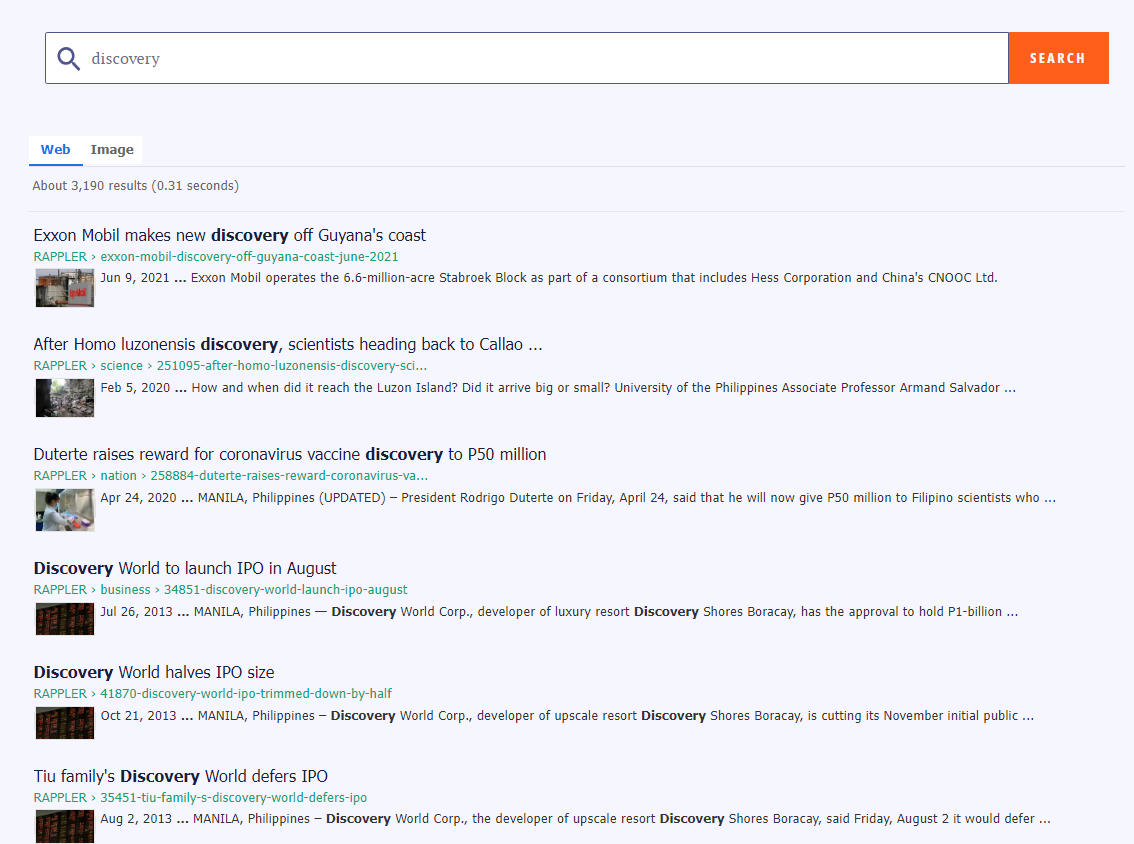

<h5 style="color:orange; font-weight:400; font-size:18px"><em>Limitations of Study</em></h5>

This exploratory study is limited to 2022 articles only. Particular focus is given to the Science and Technology sections of the website, although other sections are used for validation and accuracy tests.

<h1 style="color:tomato; font-family:Georgia; font-size:30px">Methodology</h1>

As mentioned in earlier sections, the objective of the project is to examine Rappler's information retrieval system by comparing a DMW-implemented IR function and the actual returns of the website's search engine. To do this, the group shall explore Rappler's website rappler.com to look for all possible data that can be used with IR.

![methodology](methodology.png)

Data mining will be done through web scraping, and all of the data will be stored to a local SQL database for easy access on different load, tests, and analysis. These include:

1. vectorization and testing, where various IR algorithms will be implemented to establish baseline performance,
2. performance analysis and calibration, where, after preprocessing and organization, data will be subject to several tests (confusion matrix, AUC-PR analysis) and calibrations (inclusion of TF-IDF and normalization algorithms),
3. IR deployment, where, upon determining the best algorithm (i.e., returns the highest PR accuracy), the group will create and implement a search engine function through this notebook; and,
4. comparative analysis, where, through data visualization and search engine inspection, the group shall see how our project's IR deployment fare with the actual search engine.

<h1 style="color:tomato; font-family:Georgia; font-size:30px">Data Source & Exploration</h1>

Rappler caters to its readers through its website `https://www.rappler.com`. It covers an array of topics including latest news, popular culture, lifestyle, entertainment, and science & technology, among others. As required under the scope of this project, all data was scraped/retrieved from the mentioned website through techniques taught in class (i.e., web scraping, SQL database, Python EDA, among others).

![](source.png)

<h1 style="color:tomato; font-family:Georgia; font-size:30px">Data Mining & Storage</h1>

Comprehensive scraping was done on the website for the target sections <b>'Science' </b> and <b>'Technology'</b>. All topics, subtopics, and article contents under these sections, tagged under 2022, were collected and saved under a local SQL database for ease of access.

<h2 style="color:darkorange; font-weight:400;">Database Setup</h2>

```python
import numpy as np
import pandas as pd
import requests
import bs4
import re
import datetime
import time
import sqlite3
import db_caller
from tqdm.notebook import tqdm

conn = db_caller.connect("LR2.db")
```

<h2 style="color:darkorange; font-weight:400;">2022 Rappler Section/Article Link Data</h2>

<h3 style="color:orange; font-weight:400; font-size:18px"><em>Webscrape Section Links</em></h3>

```python
# Request main page
proxies = {'http': 'http://206.189.157.23'}
resp = requests.get('http://www.rappler.com', proxies=proxies)
soup = bs4.BeautifulSoup(resp.text)

# Get section links
topic_li = soup.select('nav.burger-nav > div[id^="submenu-panel-"][data-depth="1"]')[0].select('li')
topics = dict([(i.text.casefold(), i.select_one('a')['href']) for i in topic_li][1:-1])

# Get subsection links + topic-subtopic dictionary
subtopic_li = [i.select('li') for i in soup.select('nav.burger-nav > div[id^="submenu-panel-"][data-depth="2"]')][1:]
topic_tree = {}
subtopics = []
for topic, links in zip(topics, subtopic_li):
    branch = []
    for link in links:
        if not bool(re.match(r'^see all', link.text.casefold())):
            subtopics.append((link.text.casefold(), link.select_one('a')['href']))
            branch.append(link.text.casefold())
    topic_tree[topic] = branch
subtopics = dict(subtopics)
```

<h3 style="color:orange; font-weight:400; font-size:18px"><em>Webscrape Article Links</em></h3>

```python
# Get articles
articles = []

for topic in tqdm(topic_tree):
    print(f'On topic page: {topic}')
    
    for subtopic in tqdm(topic_tree[topic]):
        print(f'    On subtopic page: {subtopic}')
        
        # Request subtopic page
        subtopic_page = subtopics[subtopic]
        soup = bs4.BeautifulSoup(requests.get(subtopic_page, proxies=proxies).text)

        while True:
            # Scrape info per article in subtopic page
            for i in soup.select('article'):
                article_topic = i.select_one('div > a').text.strip().casefold()
                article_title = i.select_one('h2 > a').text.strip().casefold()
                article_link = i.select_one('h2 > a')['href']
                article_date = i.select_one('time')['datetime']
                retrieval_date = datetime.datetime.now().strftime('%Y-%m-%dT%H:%M:%S+00:00')
                # Append article info if published in 2022
                if article_date[:4] == '2022':
                    stop_2022 = False
                    articles.append([topic, subtopic, article_title, article_topic, article_link, article_date, retrieval_date])
                else:
                    stop_2022 = True

            # If articles are no longer published in 2022, move to next subtopic
            if stop_2022:
                break
            # If there is still a next page, move to next page
            elif soup.select_one('div.pagination'):
                next_page = soup.select_one('div.pagination a')['href']
                soup = bs4.BeautifulSoup(requests.get(next_page, proxies=proxies).text)
                time.sleep(np.random.choice(np.arange(1,10)))
                print(f'        {next_page}')
            else:
                break
```

<h3 style="color:orange; font-weight:400; font-size:18px"><em>Load Article Links Table</em></h3>

```python
cols = ['Page Topic', 'Page Subtopic', 'Article Title', 'Article Topic', 'Article Link', 'Article Date', 'Retrieval Date']
articles_df = pd.DataFrame(articles, columns=cols)
articles_df = articles_df.drop_duplicates(['Article Title'])
articles_df = articles_df[articles_df['Article Topic'] != 'rappler+ exclusives']
print(articles_df.shape)
articles_df.head()

try:
    articles_df.to_sql('rappler_2022', conn, if_exists='fail', index=False)
except ValueError:
    print('Already in database.')
```

<h2 style="color:darkorange; font-weight:400;">2022 Rappler Scitech Article Data</h2>

<h3 style="color:orange; font-weight:400; font-size:18px"><em>Webscrape Scitech Article Link Contents</em></h3>

```python
scitech_df = articles_df[(articles_df['Page Topic'] == 'technology') | (articles_df['Page Topic'] == 'science')]
scitech_links = scitech_df['Article Link'].to_numpy()
scitech_df = scitech_df[['Page Topic', 'Article Topic', 'Article Title']]
print(scitech_df.shape)
scitech_df.head()

# Get science and technology article summary and contents
scitech_summary = []
scitech_content = []

for link in tqdm(scitech_links):
    soup = bs4.BeautifulSoup(requests.get(link, proxies=proxies).text)
    summary = soup.select_one('div.post-single__summary').text.strip().casefold()
    summary = re.sub(r'\s', r' ', summary)
    scitech_summary.append(summary)
    
    content = soup.select_one('div.post-single__content').text.strip().casefold()
    content = re.sub(r'\s', r' ', content)
    scitech_content.append(content)

    time.sleep(np.random.choice(np.arange(1, 8)))
```

<h3 style="color:orange; font-weight:400; font-size:18px"><em>Load Scitech Article Contents</em></h3>

```python
scitech_df['Summary'] = scitech_summary
scitech_df['Content'] = scitech_content
print(scitech_df.shape)
scitech_df.head()

try:
    scitech_df.to_sql('rappler_scitech', conn, if_exists='fail', index=False)
except ValueError:
    print('Already in database.')
```

<h1 style="color:tomato; font-family:Georgia; font-size:30px">Loading, Testing, & Vectorization</h1>

<h2 style="color:darkorange; font-weight:400;">Data Loading</h2>

We call the database and retrieve pertinent information on the webscraped science and technology articles from Rappler.

In [22]:
from IPython.display import HTML, display
from wordcloud import WordCloud
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import webbrowser
from ir_tools import *  # Custom made information retrieval tools
import db_caller  # Anonymously connect to the database
%matplotlib inline

# For WordCloud visualization

plt.style.use('ggplot')
n = 1


def fig_label(title, subtitle):
    """Display HTML text in a figure caption format."""
    global n
    txt = display(HTML(f'<span style="font-size:16px"><b>\
    Figure    {n}.  {title}</b></span><br>{subtitle}'))
    n += 1
    return txt

In [2]:
conn = db_caller.connect('LR2.db')
scitech_df = pd.read_sql('SELECT * FROM rappler_scitech', conn)
rappler_df = pd.read_sql('SELECT * FROM rappler_2022', conn)
scitech_df = pd.merge(scitech_df, rappler_df[['Article Title', 'Article Link']], how='left', on='Article Title')
scitech_df.head()

Page Topic Article Topic  \
0  technology  social media   
1  technology    technology   
2  technology    technology   
3  technology          apps   
4  technology    technology   

                                       Article Title  \
0  google approves trump’s truth social for play ...   
1  password manager lastpass reports breach, says...   
2  tiktok refutes researcher’s claims that in-app...   
3  messaging app telegram to launch paid subscrip...   
4  grabmaps seeks to provide more accurate mappin...   

                                             Summary  \
0  trump media & technology group, which operates...   
1  lastpass ceo karim toubba says an investigatio...   
2  security researcher felix krause says tiktok, ...   
3  'the only way to let our most demanding fans g...   
4  grab is completing its move to use its own map...   

                                             Content  \
0  alphabet inc’s google has approved former us p...   
1  washington, dc, usa – popular digital password...   
2  play  video      a new analysis revealed that ...   
3  messaging app telegram will launch a paid subs...   
4  manila, philippines – grab on wednesday, june ...   

                                        Article Link  
0  https://www.rappler.com/technology/social-medi...  
1  https://www.rappler.com/technology/password-ma...  
2  https://www.rappler.com/technology/tiktok-refu...  
3  https://www.rappler.com/technology/apps/telegr...  
4  https://www.rappler.com/technology/grabmaps-so...

<h2 style="color:darkorange; font-weight:400;">Data Vectorization</h2>

We convert all words associated with an article (minus the topic) into a simple unigram bag of words vector representation.

In [3]:
# Concatenate title, summary, and content per article into one string
scitech_words = scitech_df[['Article Title', 'Summary', 'Content']].agg(
    ' '.join, axis=1).to_numpy()

# Create Bag of Words Representations of Words column per article
scitech_bow = to_bow(scitech_words)
scitech_bow

a  aaa  aalalay  aapl  aarhus  aatake  abacus  abandon  abandoned  \
0     7    0        0     0       0       0       0        0          0   
1     8    0        0     0       0       0       0        0          0   
2     9    0        0     0       0       0       0        0          0   
3     6    0        0     0       0       0       0        0          0   
4    12    0        0     0       0       0       0        0          0   
..   ..  ...      ...   ...     ...     ...     ...      ...        ...   
460   8    0        0     0       0       0       0        0          0   
461  24    0        0     0       0       0       0        0          1   
462   3    0        0     0       0       0       0        0          0   
463   9    0        0     0       0       0       0        0          0   
464  21    0        0     0       0       0       0        0          0   

     abandoning  ...  zuboff  zucked  zucker  zuckerberg  zuckerman  zunyou  \
0             0  ...       0       0       0           0          0       0   
1             0  ...       0       0       0           0          0       0   
2             0  ...       0       0       0           0          0       0   
3             0  ...       0       0       0           0          0       0   
4             0  ...       0       0       0           0          0       0   
..          ...  ...     ...     ...     ...         ...        ...     ...   
460           0  ...       0       0       0           0          0       0   
461           0  ...       0       0       0           0          0       0   
462           0  ...       0       0       0           0          0       0   
463           0  ...       0       0       0           0          0       0   
464           0  ...       0       0       0           0          0       0   

     zurks  zvezda  zvonimir  zynga  
0        0       0         0      0  
1        0       0         0      0  
2        0       0         0      0  
3        0       0         0      0  
4        0       0         0      0  
..     ...     ...       ...    ...  
460      0       0         0      0  
461      0       0         0      0  
462      0       0         0      0  
463      0       0         0      0  
464      0       0         0      0  

[465 rows x 18585 columns]

<h2 style="color:darkorange; font-weight:400;">Information Retrieval Testing</h2>

A vectorizer class is initialized and mapped based on the above bag of words matrix in order to create a test query. We want to see if intuitively, search results make sense using `cosine distance` and `lp-norm distance`.

In [4]:
# Build vectorizer mapper
v = Vectorizer()
v.build_mappings(scitech_words)

<h3 style="color:orange; font-weight:400; font-size:18px"><em>Cosine Distance</em></h3>

Based on one search using `cosine distance`, we can see that the top 5 articles pertaining to `elon musk` are relevant be being present in the article and content.

In [5]:
scitech_df.iloc[nearest_k(v.vectorize('elon musk'),
                          scitech_bow.to_numpy(), 5, dcos)]

Page Topic  Article Topic  \
250  technology   social media   
273  technology     technology   
254  technology   social media   
329  technology  tech features   
252  technology   social media   

                                         Article Title  \
250  musk’s $44-billion twitter deal at risk of bei...   
273  elon musk is sued by shareholders over delay i...   
254  musk says twitter may charge slight fee for co...   
329  cold feet? why elon musk may be trying to pull...   
252  elon musk, twitter sued by shareholder over $4...   

                                               Summary  \
250  short-seller hindenburg research says elon mus...   
273  in a proposed class action filed in manhattan ...   
254  (2nd update) 'twitter will always be free for ...   
329  new twists and turns come up as elon musk rais...   
252  the lawsuit seeks to delay the merger's closin...   

                                               Content  \
250  short-seller hindenburg research warned on mon...   
273  new york, usa – elon musk was sued on tuesday,...   
254  elon musk said on tuesday, may 3, twitter migh...   
329  has elon musk developed cold feet? is he exper...   
252  a florida pension fund sued elon musk and twit...   

                                          Article Link  
250  https://www.rappler.com/technology/social-medi...  
273  https://www.rappler.com/technology/elon-musk-s...  
254  https://www.rappler.com/technology/social-medi...  
329  https://www.rappler.com/technology/features/el...  
252  https://www.rappler.com/technology/social-medi...

<h3 style="color:orange; font-weight:400; font-size:18px"><em>Lp-Norm Distance</em></h3>

The same cannot be said about searching using `lp-norm distance` -- nearly all of the top 5 articles seem irrelevant to `elon musk`. Intuitively, this is most likely because document lengths are adding noise to the actual nearest k documents.

In [6]:
scitech_df.iloc[nearest_k(v.vectorize('elon musk'),
                          scitech_bow.to_numpy(), 5, lpnorm)]

Page Topic     Article Topic  \
83   technology              play   
151  technology  internet culture   
170  technology      social media   
255  technology      social media   
9    technology        technology   

                                         Article Title  \
83                     rappler game night: ‘fall guys’   
151           pornhub-owner mindgeek’s ceo, coo resign   
170  [watch] in the public square with john nery: t...   
255  twitter estimates spam, fake accounts comprise...   
9               xiaomi launches 12t, priced at p26,999   

                                               Summary  \
83   join us on friday, july 8, at 9 pm as rapplers...   
151  pornhub's chief executive officer feras antoon...   
170  advertisers and users alike are gradually exit...   
255  twitter says in a filing it faced several risk...   
9    the 12t pro, which has a 200mp camera, retails...   

                                               Content  \
83   the premise is simple: you play a flouncy pill...   
151  pornhub-owner mindgeek said on tuesday, june 2...   
170  now that twitter has been taken over by elon m...   
255  twitter estimated in a filing on monday, may 2...   
9    manila, philippines – xiaomi on thursday, nove...   

                                          Article Link  
83   https://www.rappler.com/hustle/play/video-game...  
151  https://www.rappler.com/technology/internet-cu...  
170  https://www.rappler.com/technology/social-medi...  
255  https://www.rappler.com/technology/social-medi...  
9    https://www.rappler.com/technology/xiaomi-laun...

<h1 style="color:tomato; font-family:Georgia; font-size:30px">Performance Analysis & Calibration</h1>

Our baseline in searching for k-nearest objects are `lp-norm` and `cosine distances`. We use precision, accuracy, F2, and the area under the precision-recall curve to determine the best distance measure for the search engine. For standardized results, we fix the query to 50 objects for the sake of uniformity. The basis of scoring is whether the system accurately returns technology (1) articles given the vector of a technology article, and does not return science (0) articles.

In [7]:
target = scitech_df['Page Topic'].map(
    {'technology': 1, 'science': 0}).to_numpy()
ir_results = []
ir_plots = []

<h2 style="color:darkorange; font-weight:400;">Baseline Performance</h2>

<h3 style="color:orange; font-weight:400; font-size:18px"><em>Cosine Distance Model Baseline</em></h3>

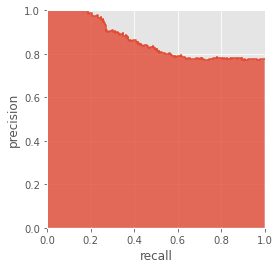

relevant  irrelevant
relevant          50           0
irrelevant       311         104

In [8]:
results = nearest_k(scitech_bow.to_numpy()[
                    0], scitech_bow.to_numpy(), 50, dcos)
confusion = get_confusion(target[0], results, target)

measure = 'Cosine Distance'
p = precision(confusion)
r = recall(confusion)
f = f_measure(p, r)
auc = auc_pr(scitech_bow.to_numpy()[
             0], scitech_bow.to_numpy(), dcos, target[0], target)

ax = pr_curve(scitech_bow.to_numpy()[
              0], scitech_bow.to_numpy(), dcos, target[0], target)
plt.show()

fig_label('Cosine Distance Baseline Precision-Recall Curve',
          f'Precision: {p*100:.2f}%<br>Recall: {r*100:.2f}%<br>\
          F2: {f*100:.2f}%<br>Area Under Curve (PR): {auc*100:.2f}%\
          <br>Confusion Matrix (length 50 search query):')
display(confusion)

ir_results.append(
    [measure, f'{p*100:.2f}%', f'{r*100:.2f}%', f'{f*100:.2f}%',
     f'{auc*100:.2f}%'])

For the cosine distance baseline, 50 true positives were retrieved, indicating cosine distance was successful in identifying up to k=50 documents. As shown in Figure 1. 311 true labels remain, while 104 labels were correctly rejected in the query.<sup>2</sup>

<h3 style="color:orange; font-weight:400; font-size:18px"><em>Lp Norm Baseline</em></h3>

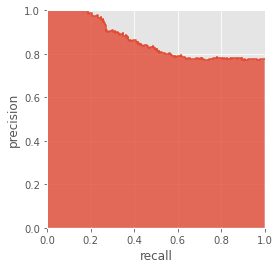

relevant  irrelevant
relevant          49           1
irrelevant       312         103

In [9]:
results = nearest_k(scitech_bow.to_numpy()[
                    0], scitech_bow.to_numpy(), 50, lpnorm)
confusion = get_confusion(target[0], results, target)

measure = 'LpNorm'
p = precision(confusion)
r = recall(confusion)
f = f_measure(p, r)
auc = auc_pr(scitech_bow.to_numpy()[
             0], scitech_bow.to_numpy(), lpnorm, target[0], target)

ax = pr_curve(scitech_bow.to_numpy()[
              0], scitech_bow.to_numpy(), dcos, target[0], target)
plt.show()

fig_label('Lp Norm Baseline Precision-Recall Curve',
          f'Precision: {p*100:.2f}%<br>Recall: {r*100:.2f}%<br>\
          F2: {f*100:.2f}%<br>Area Under Curve (PR): {auc*100:.2f}%\
          <br>Confusion Matrix (length 50 search query):')
display(confusion)

ir_results.append(
    [measure, f'{p*100:.2f}%', f'{r*100:.2f}%', f'{f*100:.2f}%',
     f'{auc*100:.2f}%'])

Lpnorm performed similarly with our k=50 object benchmark, albeit slightly poorer: 1 class label was retrieved incorrectly. Still, at 98% precision, the difference is minimal and still shows good results. At this point, it would be better to implement similarity distances with cosine distance metric.

<h2 style="color:darkorange; font-weight:400;">Calibrated Performance</h2>

<h3 style="color:orange; font-weight:400; font-size:18px"><em>Cosine Distance + TF-IDF</em></h3>

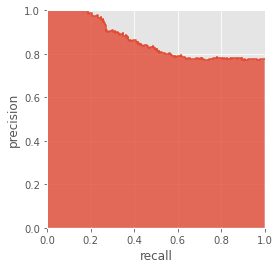

relevant  irrelevant
relevant          50           0
irrelevant       311         104

In [10]:
tfidf = TFIDF(scitech_bow)
results = nearest_k(tfidf.tfidf(scitech_bow.to_numpy()[0]), tfidf.tfidf(
    scitech_bow).to_numpy(), 50, dcos)
confusion = get_confusion(target[0], results, target)

measure = 'Cosine Distance + TF-IDF'
p = precision(confusion)
r = recall(confusion)
f = f_measure(p, r)
auc = auc_pr(tfidf.tfidf(scitech_bow.to_numpy()[0]), tfidf.tfidf(
    scitech_bow).to_numpy(), dcos, target[0], target)

ax = pr_curve(scitech_bow.to_numpy()[
              0], scitech_bow.to_numpy(), dcos, target[0], target)
plt.show()

fig_label('Cosine Distance + TF-IDF Precision-Recall Curve',
          f'Precision: {p*100:.2f}%<br>Recall: {r*100:.2f}%<br>\
          F2: {f*100:.2f}%<br>Area Under Curve (PR): {auc*100:.2f}%\
          <br>Confusion Matrix (length 50 search query):')
display(confusion)

ir_results.append(
    [measure, f'{p*100:.2f}%', f'{r*100:.2f}%', f'{f*100:.2f}%',
     f'{auc*100:.2f}%'])

Using cosine distance with TF-IDF resulted to an improvement in the AUC PR curve from 85.83% (Figure 1) to 96.82% (Figure 3). TF-IDF deemphasized stopwords (like 'a', 'the', 'of',etc) and gives more relevant words resulting to improved AUC PR Curve.

<h3 style="color:orange; font-weight:400; font-size:18px"><em>Lp Norm + L1 Normalization</em></h3>

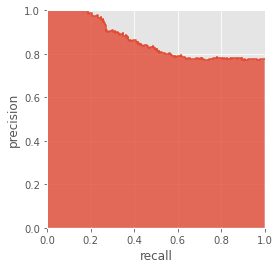

relevant  irrelevant
relevant          50           0
irrelevant       311         104

In [11]:
results = nearest_k(normalize1(scitech_bow.to_numpy()[0]), normalize1(
    scitech_bow.to_numpy()), 50, lpnorm)
confusion = get_confusion(target[0], results, target)

measure = 'LpNorm + L1 Normalization'
p = precision(confusion)
r = recall(confusion)
f = f_measure(p, r)
auc = auc_pr(normalize1(scitech_bow.to_numpy()[0]), normalize1(
    scitech_bow.to_numpy()), lpnorm, target[0], target)

ax = pr_curve(scitech_bow.to_numpy()[
              0], scitech_bow.to_numpy(), dcos, target[0], target)
plt.show()

fig_label('Lp Norm + L1 Normalization Precision-Recall Curve',
          f'Precision: {p*100:.2f}%<br>Recall: {r*100:.2f}%<br>\
          F2: {f*100:.2f}%<br>Area Under Curve (PR): {auc*100:.2f}%\
          <br>Confusion Matrix (length 50 search query):')
display(confusion)

ir_results.append(
    [measure, f'{p*100:.2f}%', f'{r*100:.2f}%', f'{f*100:.2f}%',
     f'{auc*100:.2f}%'])

The L1 normalization improved the AUC PR Curve from 82.32% (Figure 2) to 85.63% (Figure 4). By normalizing, we can make all dimensions to be of comparable magnitude and range so that the same numerical change in any dimension are conceptually comparable.

<h3 style="color:orange; font-weight:400; font-size:18px"><em>Lp Norm + L2 Normalization</em></h3>

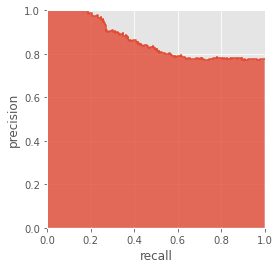

relevant  irrelevant
relevant          50           0
irrelevant       311         104

In [12]:
results = nearest_k(normalize2(scitech_bow.to_numpy()[0]), normalize2(
    scitech_bow.to_numpy()), 50, lpnorm)
confusion = get_confusion(target[0], results, target)

measure = 'LpNorm + L2 Normalization'
p = precision(confusion)
r = recall(confusion)
f = f_measure(p, r)
auc = auc_pr(normalize2(scitech_bow.to_numpy()[0]), normalize2(
    scitech_bow.to_numpy()), lpnorm, target[0], target)

ax = pr_curve(scitech_bow.to_numpy()[
              0], scitech_bow.to_numpy(), dcos, target[0], target)
plt.show()

fig_label('Lp Norm + L2 Normalization Precision-Recall Curve',
          f'Precision: {p*100:.2f}%<br>Recall: {r*100:.2f}%<br>\
          F2: {f*100:.2f}%<br>Area Under Curve (PR): {auc*100:.2f}%\
          <br>Confusion Matrix (length 50 search query):')
display(confusion)

ir_results.append(
    [measure, f'{p*100:.2f}%', f'{r*100:.2f}%', f'{f*100:.2f}%',
     f'{auc*100:.2f}%'])

L2 normalization improved the AUC PR curve further to 85.83%. For this case, AUC PR curves indicate that L2 is better in minimizing prediction errors.

<h2 style="color:darkorange; font-weight:400;">Model Summary</h2>

In [13]:
ir_df = pd.DataFrame(ir_results, columns=['Distance Measure', 'Precision',
                                          'Recall', 'F2', 'AUC-PR'])
display(ir_df.set_index('Distance Measure'))

Precision  Recall      F2  AUC-PR
Distance Measure                                           
Cosine Distance             100.00%  13.85%  24.33%  85.83%
LpNorm                       98.00%  13.57%  23.84%  82.32%
Cosine Distance + TF-IDF    100.00%  13.85%  24.33%  96.82%
LpNorm + L1 Normalization   100.00%  13.85%  24.33%  85.63%
LpNorm + L2 Normalization   100.00%  13.85%  24.33%  85.83%

Among the different distance measures, <b>Cosine Distance + TF-IDF</b> returns the highest AUC PR score while <b>base LpNorm</b> fared the lowest AUC-PR score. Implementing normalization, either L1 or L2, improved the AUC PR score marginally. The low recall is understandable given our fixed k objects at 50; higher k up to N documents is sufficiently covered by the AUC-PR graph.

<h2 style="color:darkorange; font-weight:400;">Data Visualization</h2>

For appreciation of the distance measures used, the group decided to find the main clusters of similar topics found in the science and technology article dataset using kmeans and the standard TfidfVectorizer, considering both unigrams and bigrams.

In [14]:
vectorizer = TfidfVectorizer(stop_words='english',
                             ngram_range=(1, 2),
                             # token_pattern=r'\b[a-zA-Z]+\b',
                             )

X = vectorizer.fit_transform(scitech_words)
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

00  00 november  000  000 000  000 10  000 13  000 373  000 659  \
0    0.0          0.0  0.0      0.0     0.0     0.0      0.0      0.0   
1    0.0          0.0  0.0      0.0     0.0     0.0      0.0      0.0   
2    0.0          0.0  0.0      0.0     0.0     0.0      0.0      0.0   
3    0.0          0.0  0.0      0.0     0.0     0.0      0.0      0.0   
4    0.0          0.0  0.0      0.0     0.0     0.0      0.0      0.0   
..   ...          ...  ...      ...     ...     ...      ...      ...   
460  0.0          0.0  0.0      0.0     0.0     0.0      0.0      0.0   
461  0.0          0.0  0.0      0.0     0.0     0.0      0.0      0.0   
462  0.0          0.0  0.0      0.0     0.0     0.0      0.0      0.0   
463  0.0          0.0  0.0      0.0     0.0     0.0      0.0      0.0   
464  0.0          0.0  0.0      0.0     0.0     0.0      0.0      0.0   

     000 85hk  000 accounts  ...   𝗜𝗡  𝗜𝗡 𝗧𝗛𝗘  𝗜𝗦𝗖𝗣  𝗜𝗦𝗖𝗣 𝗥𝗔𝗡𝗞𝗦  𝗥𝗔𝗡𝗞𝗦  \
0         0.0           0.0  ...  0.0     0.0   0.0         0.0    0.0   
1         0.0           0.0  ...  0.0     0.0   0.0         0.0    0.0   
2         0.0           0.0  ...  0.0     0.0   0.0         0.0    0.0   
3         0.0           0.0  ...  0.0     0.0   0.0         0.0    0.0   
4         0.0           0.0  ...  0.0     0.0   0.0         0.0    0.0   
..        ...           ...  ...  ...     ...   ...         ...    ...   
460       0.0           0.0  ...  0.0     0.0   0.0         0.0    0.0   
461       0.0           0.0  ...  0.0     0.0   0.0         0.0    0.0   
462       0.0           0.0  ...  0.0     0.0   0.0         0.0    0.0   
463       0.0           0.0  ...  0.0     0.0   0.0         0.0    0.0   
464       0.0           0.0  ...  0.0     0.0   0.0         0.0    0.0   

     𝗥𝗔𝗡𝗞𝗦 𝗜𝗡  𝗧𝗛𝗘  𝗧𝗛𝗘 𝗨𝗡𝗜𝗩𝗘𝗥𝗦𝗘  𝗨𝗡𝗜𝗩𝗘𝗥𝗦𝗘  𝗨𝗡𝗜𝗩𝗘𝗥𝗦𝗘 iscp  
0         0.0  0.0           0.0       0.0            0.0  
1         0.0  0.0           0.0       0.0            0.0  
2         0.0  0.0           0.0       0.0            0.0  
3         0.0  0.0           0.0       0.0            0.0  
4         0.0  0.0           0.0       0.0            0.0  
..        ...  ...           ...       ...            ...  
460       0.0  0.0           0.0       0.0            0.0  
461       0.0  0.0           0.0       0.0            0.0  
462       0.0  0.0           0.0       0.0            0.0  
463       0.0  0.0           0.0       0.0            0.0  
464       0.0  0.0           0.0       0.0            0.0  

[465 rows x 157925 columns]

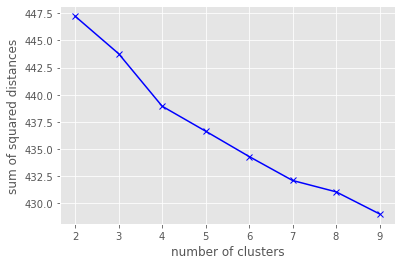

In [15]:
# k-means clustering
sum_of_squared_distances = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, max_iter=600, n_init=10)
    km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('sum of squared distances')
plt.show()
fig_label('Elbow Method for Finding Optimal k',
          'In order to further understand the database of words, k-means\
        clustering was done to find a suitable k that would provide the main\
        topics found in science and technology Rappler articles.')

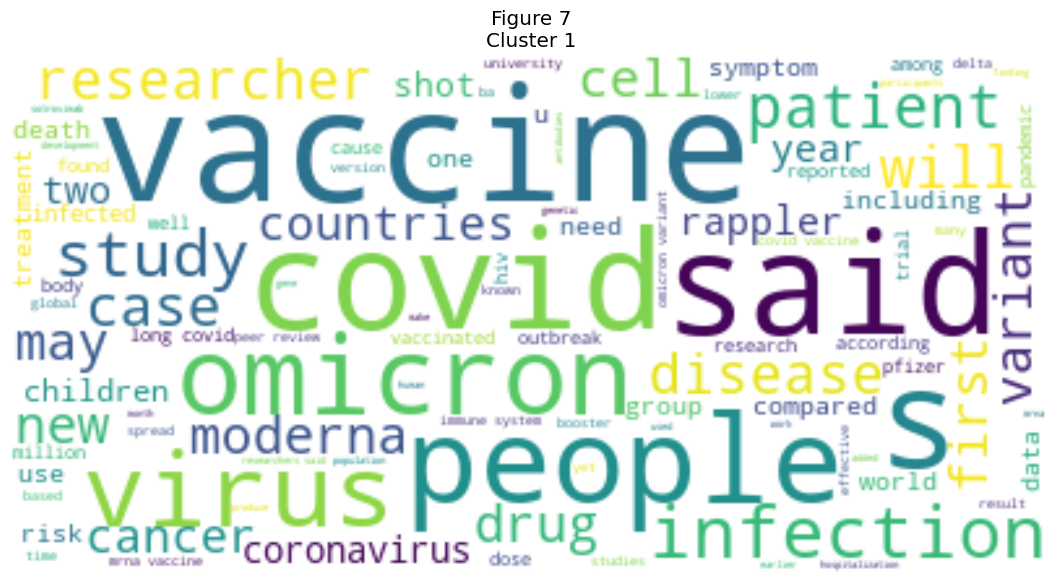

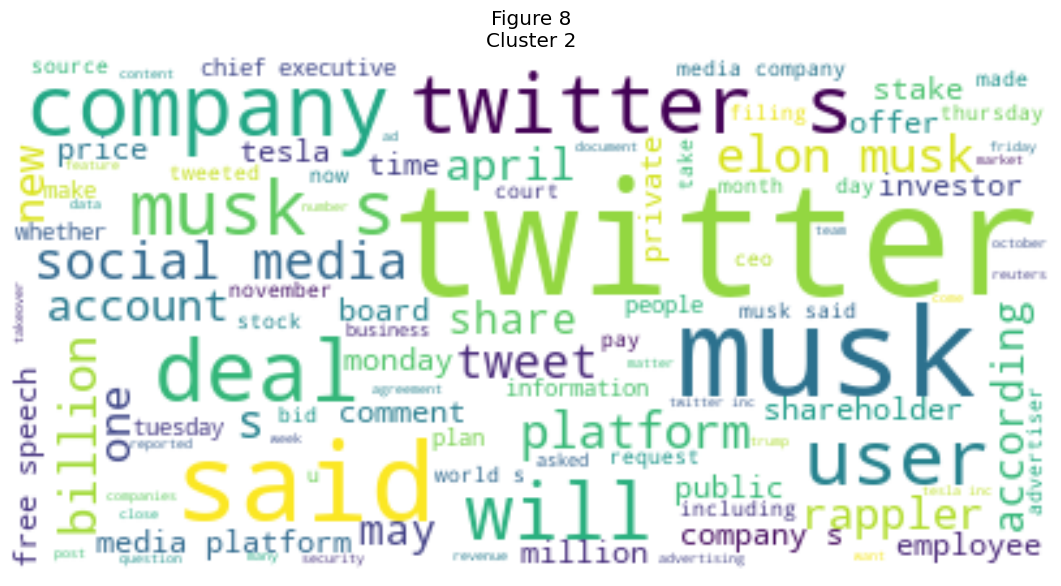

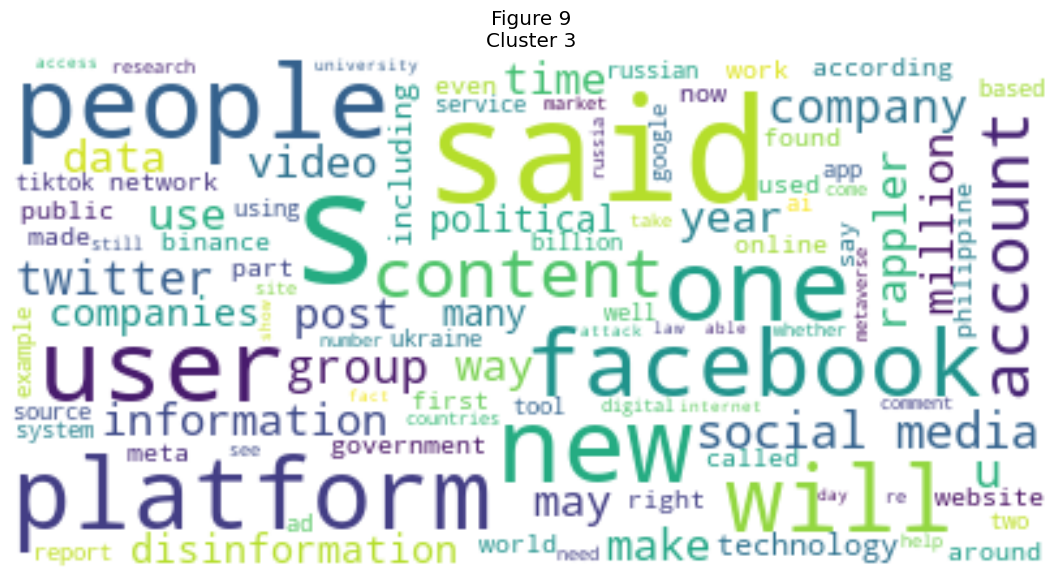

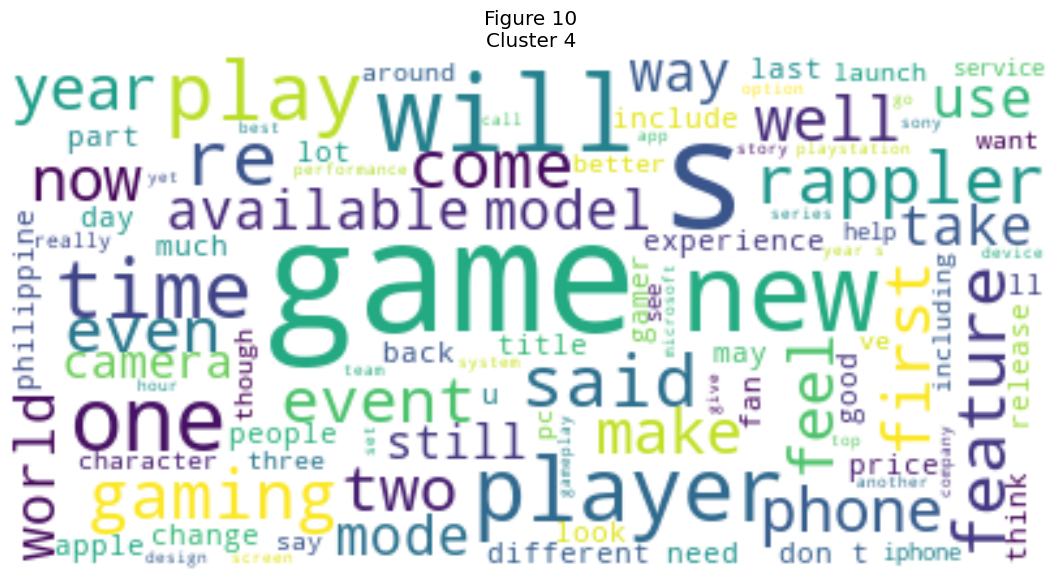

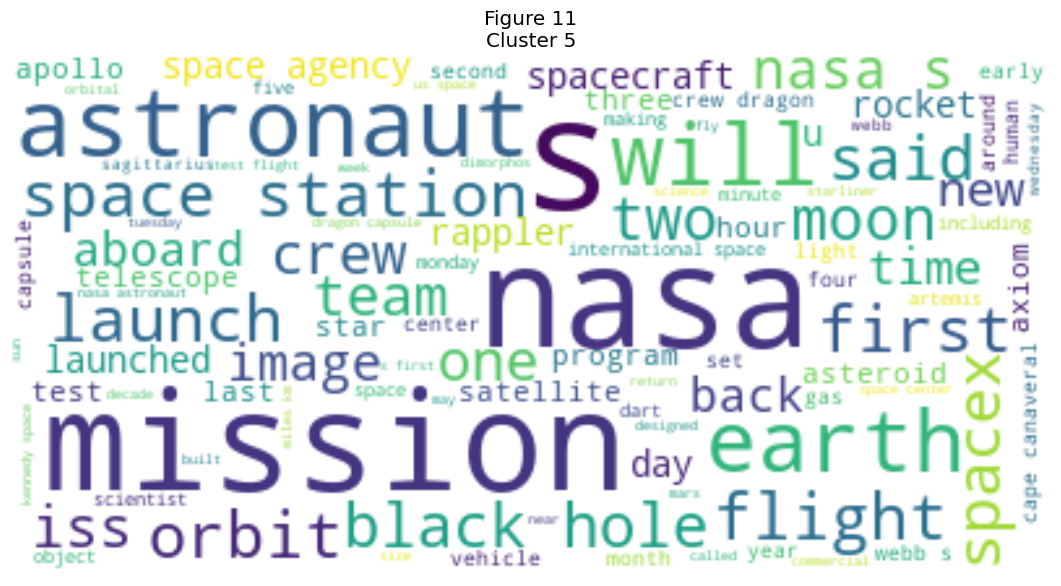

In [16]:
np.random.seed(1)

# Get clusters
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init=10)
model.fit(X)

# Get prediction/labels
labels = model.labels_
topic_cl = pd.DataFrame(list(zip(scitech_df['Content'], labels)),
                        columns=['article', 'cluster'])

# Visualize the clusters
# Create wordclouds from clusters
for k in range(true_k):
    text = topic_cl[topic_cl.cluster == k].article.str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=60,
                          max_words=100,
                          contour_color='#023075',
                          contour_width=3,
                          background_color='white').generate(text)
    # Create subplot
    plt.figure(figsize=(80, 40), dpi=100)
    plt.subplot(true_k, 1, k+1).set_title('Figure ' +
                                          str(n) + '\nCluster ' + str(k+1))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

    n += 1

Using `k = 5`, we identify the themes per cluster as:<br>
* Cluster 1: **Health** (COVID, vaccine)<br>
* Cluster 2: **Twitter takeover** (Twitter, Elon Musk)<br>
* Cluster 3: **Social Media Platforms** (Facebook, social media)<br>
* Cluster 4: **Videogames** (games, player)<br>
* Cluster 5: **Astronomy** (NASA, space)<br>

We expect to see highly relevant search returns for queries with keywords that fall under these main themes.

<h1 style="color:tomato; font-family:Georgia; font-size:30px">Results and Discussion</h1>

IR implementation through different distance measure results to 100% precision on all except 1 (LpNorm), yet low recall. This is primarily because the classifier only searches for topics ‘Science’ and ‘Technology’ among an array of topics from Rappler website. We want a high precision to return contents under ‘Science’ and ‘Technology’ tagged correctly while lowering recall, or returning any article outside the scope of the two mentioned sections.

Through further calibration, we determined the best IR algorithm to use for the intended recommender system, which is cosine distance  measurement combined with term frequency-inverse document frequency algorithm. AUC-PR curve was improved, from an 85% baseline to a little under 97%. Hence, we can confidently say that the implementation predicted correct contents under the ‘Science’ and ‘Technology’ while highly deemphasizing any words that do not amount to relevance (i.e., stop words).

With this overall, a search engine function is created and implemented, which results were compared to the actual search engine results. See below for the implementation and comparative analysis.

<h2 style="color:darkorange; font-weight:400;">Search Engine Function</h2>

In [17]:
class RapplerSearch:
    def __init__(self, df, docs):
        self.df = df
        self.bow = to_bow(docs)
        self.tfidf = TFIDF(self.bow)
        self.vec = Vectorizer()
        self.history = []

        self.vec.build_mappings(docs)

    def search(self, k, history_log=True):
        """Return the k most relevant articles given a search query."""
        query = input('Search Rappler Science and Technology Articles:\n\n')
        if not isinstance(query, str):
            print('Invalid input')
            return
        query = query.strip().casefold()
        v_query = self.vec.vectorize(query)
        results = nearest_k(self.tfidf.tfidf(v_query),
                            self.tfidf.tfidf(self.bow),
                            k,
                            dcos)
        if history_log:
            self.history.append([query, list(results)])

        output = self.df.iloc[results].copy()
        output = output.reset_index(drop=True)
        output.index = output.index + 1  # shifting index
        display(output)

        reader = input('Read an Article? (Y/N)\n\n')

        if reader.strip().casefold() == 'y':
            article = input('Which Search Result?\n\n')
            try:
                article = int(article)
            except Exception:
                print('Invalid input')
            content = input('Title, Summary, Content, or Webpage?\n\n')
            if not isinstance(content, str):
                print('Invalid input')
            else:
                self.read(results[article-1], content=content)

    def hist(self):
        """Return a DataFrame of previous search queries."""
        return pd.DataFrame(self.history, columns=['Query', 'Results'])

    def read(self, ind, content='Content'):
        """Return the contents of an article given its index."""
        if content.strip().casefold() == 'title':
            print(self.df['Article Title'][ind])
        elif content.strip().casefold() == 'summary':
            print(self.df['Summary'][ind])
        elif content.strip().casefold() == 'content':
            print(self.df['Content'][ind])
        elif content.strip().casefold() == 'webpage':
            print(self.df['Article Link'][ind])
            return webbrowser.open(self.df['Article Link'][ind])

<h2 style="color:darkorange; font-weight:400;">Search Engine Comparative Analysis</h2>

In [18]:
new_tab = RapplerSearch(scitech_df, scitech_words)

In [19]:
new_tab.search(10)

Search Rappler Science and Technology Articles:

iPhone


Page Topic Article Topic  \
1   technology       gadgets   
2   technology       gadgets   
3   technology       gadgets   
4   technology    technology   
5   technology       gadgets   
6   technology       gadgets   
7   technology       gadgets   
8   technology       gadgets   
9   technology       gadgets   
10  technology    technology   

                                        Article Title  \
1   mac users will soon be able to use their iphon...   
2   apple iphone 14 prices: base model starts at p...   
3   iphone 14 ditches notch cutout, debuts dynamic...   
4    apple cuts production of iphone 14 plus – report   
5        apple to cut iphone, airpods output – nikkei   
6   apple upgrades iphone se with 5g, high-end mac...   
7   apple to appeal brazil sales ban of iphone wit...   
8   what is expected at apple’s ‘far out’ fall event?   
9   apple’s iphone development schedule delayed by...   
10  apple to keep iphone production flat in 2022 –...   

                                              Summary  \
1   the feature is compatible with the iphone xr o...   
2   this year's models are more expensive by p6,00...   
3   the new feature, however, is exclusive to the ...   
4   the move to cut production of the iphone 14 pl...   
5   apple plans to make about 20% fewer iphone ses...   
6   (1st update) for $429, the updated iphone se c...   
7   authorities claim that there is no evidence th...   
8   the next apple launch is the first in-person, ...   
9   initial production volumes of the next iphones...   
10  the developments also come as investors brace ...   

                                              Content  \
1   manila, philippines – apple announced on tuesd...   
2   manila, philippines – apple has made the price...   
3   apple on thursday, september 8, philippine tim...   
4   apple inc is cutting production of the iphone ...   
5   apple is planning to cut the output of its iph...   
6   new york, usa – apple on tuesday, march 8, add...   
7   sao paulo, brazil – apple inc said on tuesday,...   
8   apple inc. will likely unveil a new line of ip...   
9   apple has told its suppliers to speed up iphon...   
10  apple plans to keep iphone production for 2022...   

                                         Article Link  
1   https://www.rappler.com/technology/gadgets/mac...  
2   https://www.rappler.com/technology/gadgets/app...  
3   https://www.rappler.com/technology/gadgets/iph...  
4   https://www.rappler.com/technology/apple-cuts-...  
5   https://www.rappler.com/technology/gadgets/app...  
6   https://www.rappler.com/technology/gadgets/app...  
7   https://www.rappler.com/technology/gadgets/app...  
8   https://www.rappler.com/technology/gadgets/wha...  
9   https://www.rappler.com/technology/gadgets/app...  
10  https://www.rappler.com/technology/apple-keep-...

Read an Article? (Y/N)

Y
Which Search Result?

1
Title, Summary, Content, or Webpage?

Webpage
https://www.rappler.com/technology/gadgets/mac-os-ventura-iphone-webcam-wwdc-2022/


Using the same search query in Rappler for <i><b>iPhone</b></i> and comparing the IR-based query results, the latter provided more relevant results since Rappler still returned results for old models of iPhone under the Rappler's Technology section.

![iphone](iphone.png)

In [20]:
new_tab.search(5)

Search Rappler Science and Technology Articles:

monkeypox


Page Topic  Article Topic  \
1     science  life & health   
2     science  life & health   
3  technology  tech features   
4  technology  tech features   
5  technology  tech features   

                                       Article Title  \
1  ‘considerable’ monkeypox transmission happens ...   
2  african monkeypox cases not concentrated among...   
3  tech wreck shows us megacaps not immune to cor...   
4  elon musk is poised to take twitter private – ...   
5     in photos: esgs makes in-person return in 2022   

                                             Summary  \
1  the study raises questions over tackling monke...   
2  the acting director of the africa centers for ...   
3  consumer-driven tech companies including meta ...   
4  why would musk or anyone want to take a compan...   
5  the premier gaming convention of the philippin...   

                                             Content  \
1  london, united kingdom – monkeypox can spread ...   
2  johannesburg, south africa – monkeypox outbrea...   
3  disappointing earnings from the megacap compan...   
4  elon musk’s proposed us$44 billion deal to acq...   
5  manila, philippines – the esports and gaming s...   

                                        Article Link  
1  https://www.rappler.com/science/life-health/mo...  
2  https://www.rappler.com/science/life-health/af...  
3  https://www.rappler.com/technology/features/te...  
4  https://www.rappler.com/technology/features/ex...  
5  https://www.rappler.com/technology/features/in...

Read an Article? (Y/N)

Y
Which Search Result?

1
Title, Summary, Content, or Webpage?

Webpage
https://www.rappler.com/science/life-health/monkeypox-transmission-happens-before-symptoms-study/


Implementing search with another keyword 'monkeypox' under Rappler's 'Science' section, our search engine implementation returns one of the latest articles dated November 3, 2022.

Using the same search query in Rappler for 'monkeypox', the actual search engine returns older articles mostly published middle of the year.

![monkeypox](monkeypox.png)

In [21]:
new_tab.hist()

Query                                   Results
0     iphone  [33, 17, 18, 12, 42, 44, 20, 19, 38, 37]
1  monkeypox                 [412, 420, 314, 313, 312]

<h1 style="color:tomato; font-family:Georgia; font-size:30px">Conclusion</h1>

From the above implementation, we see that this project's search engine implementation, through IR function tests and calibrations, returns quite better results than Rappler's actual search engine. One reason for this may be search engine optimization; that is, results from Rappler's search engine are already weighted from its own analytics.

One of the things that we have learned this year especially in our Marketing class is search engine optimization. By the use of keywords, we can measure traffic for webpages and see where the most traffic occur. This can paralleled with the objective of information and object retrieval we've discussed in DMW, as it tests similarities between queries and corpuses. By calibrating IR algorithms, this can be applied to the optimization of search engines to accurately return results from a readers' actual searches and, subsequently, topics of interest.

<h1 style="color:tomato; font-family:Georgia; font-size:30px">Recommendation</h1>

For IR-based query, Cosine Distance + TF-IDF provided the best results in terms of recall, precision, F-measure, and AUC-PR curve.<br>

The IR-based query provided more relevant results versus Rappler's search results based on initial test queries ('iphone', 'monkeypox') within Rappler's Science and Technology sections.

The group notes, however, that this study is confined to only Science and Technology sections, defined in the scope earlier. By design, class labels are limited to the aformentioned topics above, which may place a higher bias on precision values (due to its low count). However, with the sample test queries above, the group believes the algorithm may provide value-add with regard to relevancy, even as it covers other sections in the site. 

Our recommendations is to implement the entire methodology for all sections of Rappler online news website. From there, precision-recall can be further examined given a wider scope of topics and sections. Clustering may also be explored to flexibly discover new topics that Rappler may use to classify its articles.

<h1 style="color:tomato; font-family:Georgia; font-size:30px">References</h1>

<sup>1</sup> "Recommender system." Wikipedia, <i>Wikimedia Foundation</i>, 6 Nov 2022, https://en.wikipedia.org/wiki/Recommender_system. Accessed 13 Nov 2022.

<sup>2</sup> "Precision-Recall." scikit-learn, scikit-learn, n.d., https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html. Accessed 22 Nov 2022.

Vu, Thu. @thuvu5. 10 Nov 2022. <i>Analyzing Book Reviews Dataset</i>. Youtube. https://www.youtube.com/watch?v=N0o-Bjiwt0M. Accessed 22 Nov 2022.